Autoregressive linear model

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

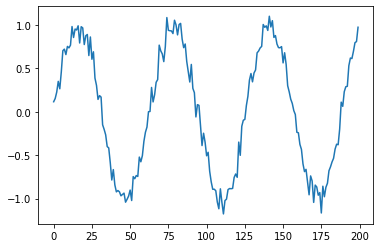

In [12]:
# Making the original data
# Note: np.random is there to add noise to the data
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

# Plot 
plt.plot(series)
plt.show()

In [23]:
# Building the dataset
# Using T - past values to predict the next values 
# T = time step
T = 10 # Time series
X = []
Y = []

for t in range(len(series) - T):
  x = series[t : t+T]
  X.append(x)
  
  y = series[t + T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

print("X.shape: ", X.shape, "Y.shape: ", Y.shape)

X.shape:  (190, 10) Y.shape:  (190,)


In [29]:
# Autoregressive linear model

i = Input(shape = (T,))
x = Dense(1)(i)

model = Model(i, x)
model.compile(loss = 'mse', optimizer=Adam(lr = 0.1))

# Train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:], Y[-N//2:])
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
3/3 [==============================] - 1s 61ms/step - loss: 0.2690 - val_loss: 0.2178
Epoch 2/80
3/3 [==============================] - 0s 11ms/step - loss: 0.1416 - val_loss: 0.0585
Epoch 3/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1374 - val_loss: 0.0787
Epoch 4/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0628 - val_loss: 0.0771
Epoch 5/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0971 - val_loss: 0.0606
Epoch 6/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0396 - val_loss: 0.0490
Epoch 7/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0646 - val_loss: 0.0451
Epoch 8/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0413 - val_loss: 0.0336
Epoch 9/80
3/3 [==============================] - 0s 10ms/step - loss: 0.0455 - val_loss: 0.0289
Epoch 10/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0265
Epoch 11/80
3/3 [=================

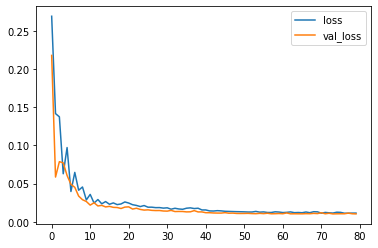

In [32]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [35]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2 :]
validation_predictions = []

# Index of the first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array -> scalar

  i += 1
  # update the predictions list
  validation_predictions.append(p)

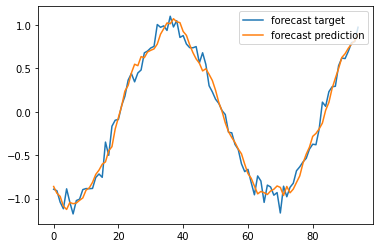

In [36]:
plt.plot(validation_target, label = 'forecast target')
plt.plot (validation_predictions, label = "forecast prediction")
plt.legend()

In [38]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1D array of lenght T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

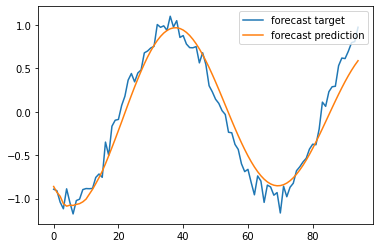

In [39]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()